In [1]:
%matplotlib inline
from IPython.display import display
from symderive import (
    Symbol, symbols, Function, Matrix, Rational, Sqrt, R,
    D, Integrate, Simplify, Expand, Sin, Cos, Exp, Pi, Array,
    Series, Limit, Eq, Solve,
    Eigenvalues, Eigenvectors, Det, Tr,
    Nest, NestList, FixedPoint,
    Table, Map, Total,
)
from symderive.diffgeo import (
    Metric, Tensor, CovariantDerivative,
    minkowski_metric, schwarzschild_metric, flrw_metric, spherical_metric_3d,
    CoordinateTransformation, cartesian_to_spherical_3d,
    symmetric_index_pairs, SymmetricMatrix, SymmetricChristoffel,
    LeviCivita, levi_civita_tensor,
    Einsum, Contract, OuterProduct, InnerProduct, Trace,
)
from symderive.plotting import Plot, ListPlot, ListLinePlot

# Differential Geometry with symderive

This notebook explores differential geometry using symderive's full suite of
tools for metrics, curvature, and tensor calculus.

## Overview

We showcase symderive's capabilities:
1. **Metric**: Define curved spaces and spacetimes
2. **Christoffel symbols**: Connection coefficients
3. **Riemann/Ricci/Scalar**: Curvature tensors
4. **Eigenvalues**: Principal curvatures
5. **Series**: Geodesic deviation expansions
6. **Plot**: Curvature visualizations
7. **NestList**: Geodesic iteration
8. **Einsum**: Einstein summation convention

## 1. Metrics and Line Elements

A metric tensor $g_{\mu\nu}$ defines geometry through the line element:

$$ds^2 = g_{\mu\nu} dx^\mu dx^\nu$$

### The 2-Sphere

$$ds^2 = d\theta^2 + \sin^2\theta \, d\phi^2$$

In [2]:
theta, phi = symbols('theta phi', real=True, positive=True)

sphere = Metric(
    coords=[theta, phi],
    components=[
        [1, 0],
        [0, Sin(theta)**2]
    ]
)

sphere.g

Matrix([
[1,             0],
[0, Sin(theta)**2]])

In [3]:
# Inverse metric
g_inv = sphere.inverse
Simplify(g_inv)

Matrix([
[1,                0],
[0, Sin(theta)**(-2)]])

## 2. Christoffel Symbols

The Christoffel symbols (connection coefficients):

$$\Gamma^\rho_{\mu\nu} = \frac{1}{2}g^{\rho\sigma}\left(\partial_\mu g_{\sigma\nu} + \partial_\nu g_{\sigma\mu} - \partial_\sigma g_{\mu\nu}\right)$$

They determine parallel transport on the manifold.

In [4]:
christoffel = sphere.christoffel_second_kind()

# Non-zero components
Gamma_theta_phi_phi = Simplify(christoffel[0, 1, 1])  # Γ^θ_φφ
Gamma_phi_theta_phi = Simplify(christoffel[1, 0, 1])  # Γ^φ_θφ

display(Gamma_theta_phi_phi, Gamma_phi_theta_phi)

-Sin(2*theta)/2

1/Tan(theta)

For the 2-sphere:
- $\Gamma^\theta_{\phi\phi} = -\sin\theta\cos\theta$
- $\Gamma^\phi_{\theta\phi} = \cot\theta$

## 3. Riemann Curvature Tensor

The Riemann tensor measures curvature:

$$R^\rho_{\;\sigma\mu\nu} = \partial_\mu\Gamma^\rho_{\nu\sigma} - \partial_\nu\Gamma^\rho_{\mu\sigma} + \Gamma^\rho_{\mu\lambda}\Gamma^\lambda_{\nu\sigma} - \Gamma^\rho_{\nu\lambda}\Gamma^\lambda_{\mu\sigma}$$

In [5]:
riemann = sphere.riemann_tensor()

# Non-trivial component R^θ_φθφ
R_theta_phi_theta_phi = Simplify(riemann[0, 1, 0, 1])
R_theta_phi_theta_phi

Sin(2*theta)/(2*Tan(theta)) - Cos(2*theta)

## 4. Ricci Tensor and Scalar Curvature

$$R_{\mu\nu} = R^\rho_{\;\mu\rho\nu}, \quad R = g^{\mu\nu}R_{\mu\nu}$$

For a unit 2-sphere, $R = 2$ (constant positive curvature).

In [6]:
ricci = sphere.ricci_tensor()
Simplify(ricci)

Matrix([
[1,                                          0],
[0, Sin(2*theta)/(2*Tan(theta)) - Cos(2*theta)]])

In [7]:
R_scalar = sphere.ricci_scalar()
Simplify(R_scalar)

2

## 5. Einstein Tensor

The Einstein tensor for general relativity:

$$G_{\mu\nu} = R_{\mu\nu} - \frac{1}{2}g_{\mu\nu}R$$

Einstein's equations: $G_{\mu\nu} = 8\pi G T_{\mu\nu}$

In [8]:
einstein = sphere.einstein_tensor()
Simplify(einstein)

Matrix([
[0, 0],
[0, 0]])

## 6. Gaussian Curvature and Visualization

The **Gaussian curvature** $K = R/2$ for a 2D surface.
For a 2-sphere, $K = 1$ everywhere.

Let's plot how $g_{\phi\phi} = \sin^2\theta$ varies with latitude.

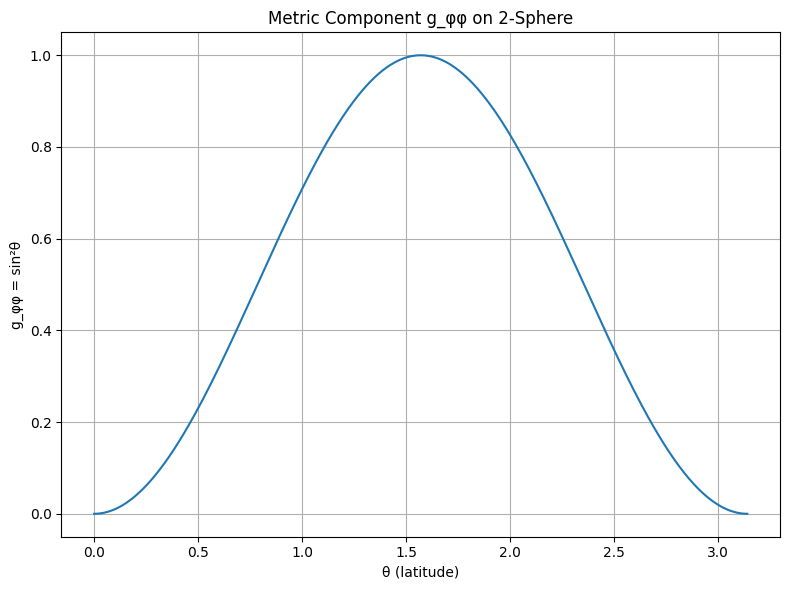

In [9]:
# Plot metric component g_φφ = sin²θ
theta_plot = Symbol('theta', real=True)

g_phi_phi = Sin(theta_plot)**2

Plot(
    g_phi_phi,
    (theta_plot, 0, 3.14159),
    PlotLabel="Metric Component g_φφ on 2-Sphere",
    AxesLabel=["θ (latitude)", "g_φφ = sin²θ"],
    GridLines=True,
)

At the equator ($\theta = \pi/2$), $g_{\phi\phi} = 1$ (maximum).
At the poles ($\theta = 0, \pi$), $g_{\phi\phi} = 0$ (coordinate singularity).

## 7. Spacetime Metrics

### Minkowski (Flat Spacetime)

$$ds^2 = -dt^2 + dx^2 + dy^2 + dz^2$$

In [10]:
eta = minkowski_metric(4)
eta.g

Matrix([
[-1, 0, 0, 0],
[ 0, 1, 0, 0],
[ 0, 0, 1, 0],
[ 0, 0, 0, 1]])

In [11]:
R_minkowski = eta.ricci_scalar()
Simplify(R_minkowski)  # Should be 0

0

### Schwarzschild (Black Hole)

$$ds^2 = -\left(1-\frac{2M}{r}\right)dt^2 + \frac{dr^2}{1-2M/r} + r^2 d\Omega^2$$

In [12]:
g_schw = schwarzschild_metric()
g_schw.g

Matrix([
[2*M/r - 1,              0,    0,                  0],
[        0, 1/(-2*M/r + 1),    0,                  0],
[        0,              0, r**2,                  0],
[        0,              0,    0, r**2*Sin(theta)**2]])

In [13]:
R_schw = g_schw.ricci_scalar()
Simplify(R_schw)  # 0 (vacuum solution)

0

### Plotting Schwarzschild Metric Components

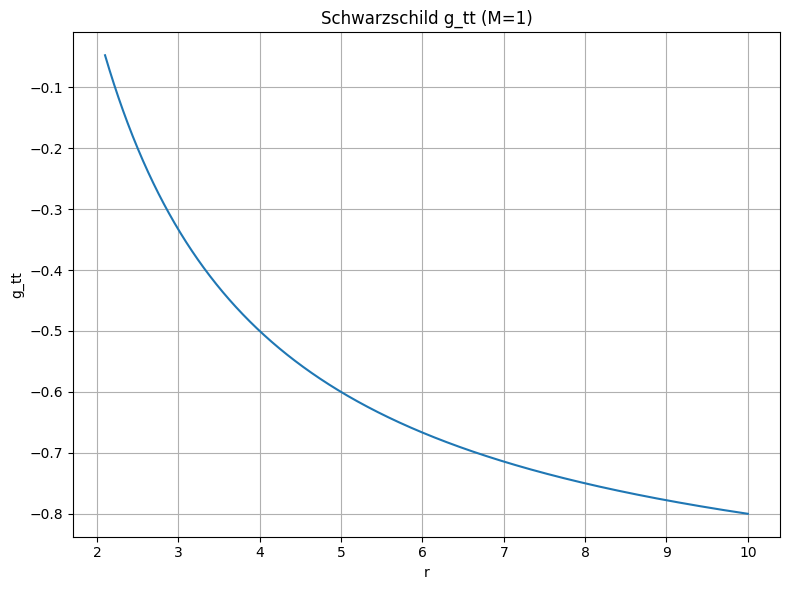

In [14]:
r_plot = Symbol('r', positive=True)
M_plot = Symbol('M', positive=True)

# g_tt = -(1 - 2M/r) with M=1
g_tt = -(1 - 2/r_plot)

# g_rr = 1/(1 - 2M/r)
g_rr = 1/(1 - 2/r_plot)

Plot(
    [g_tt],
    (r_plot, 2.1, 10),
    PlotLabel="Schwarzschild g_tt (M=1)",
    AxesLabel=["r", "g_tt"],
    GridLines=True,
)

At the event horizon $r = 2M$, $g_{tt} \to 0$ and $g_{rr} \to \infty$
(coordinate singularity).

## 8. Geodesics via NestList

Geodesics satisfy:

$$\frac{d^2 x^\mu}{d\tau^2} + \Gamma^\mu_{\rho\sigma}\frac{dx^\rho}{d\tau}\frac{dx^\sigma}{d\tau} = 0$$

We can iterate the geodesic equation using **NestList**.

In [15]:
import numpy as np

# Numerical geodesic on 2-sphere
# State: (theta, phi, dtheta/dlambda, dphi/dlambda)

def geodesic_step_sphere(state, dlambda=0.05):
    """One step of geodesic integration on unit 2-sphere."""
    theta_g, phi_g, dtheta, dphi = state

    # Christoffel symbols: Γ^θ_φφ = -sin(θ)cos(θ), Γ^φ_θφ = cot(θ)
    sin_theta = np.sin(theta_g)
    cos_theta = np.cos(theta_g)

    # Geodesic equations
    d2theta = sin_theta * cos_theta * dphi**2
    d2phi = -2 * (cos_theta / sin_theta) * dtheta * dphi if sin_theta > 0.01 else 0

    # Euler step
    new_theta = theta_g + dtheta * dlambda
    new_phi = phi_g + dphi * dlambda
    new_dtheta = dtheta + d2theta * dlambda
    new_dphi = dphi + d2phi * dlambda

    return (new_theta, new_phi, new_dtheta, new_dphi)

# Initial condition: start at θ=π/2, φ=0, moving in φ direction
initial = (np.pi/2, 0.0, 0.0, 1.0)

# Iterate 100 steps
geodesic_path = NestList(geodesic_step_sphere, initial, 100)

# Extract positions
theta_path = [s[0] for s in geodesic_path]
phi_path = [s[1] for s in geodesic_path]

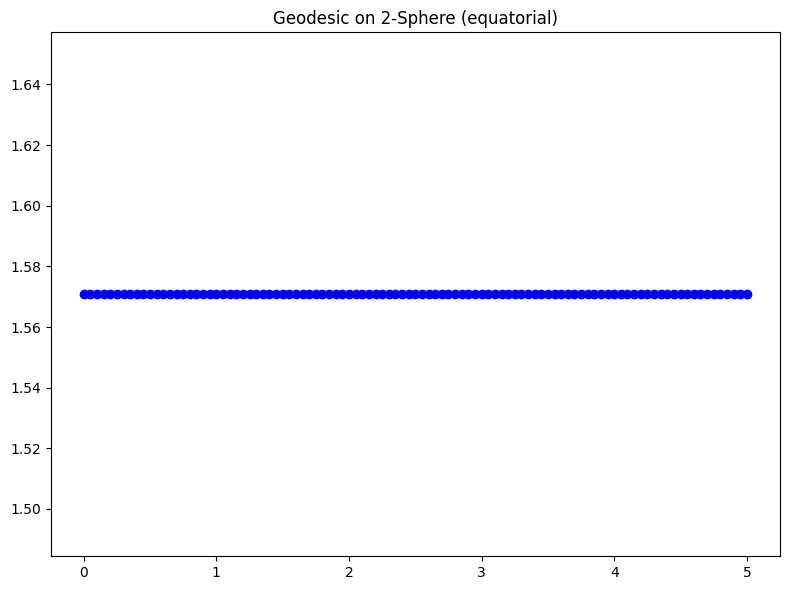

In [16]:
# Plot geodesic on sphere (great circle at equator)
geodesic_data = list(zip(phi_path, theta_path))

ListLinePlot(
    geodesic_data,
    PlotLabel="Geodesic on 2-Sphere (equatorial)",
    AxesLabel=["φ", "θ"],
    PlotStyle="Blue",
    GridLines=True,
)

The geodesic at the equator ($\theta = \pi/2$) stays at constant $\theta$ -
it's a great circle!

## 9. Curvature of Different Surfaces

Let's compare curvature scalars using **Eigenvalues** of the Ricci tensor.

In [17]:
# Eigenvalues of Ricci tensor (principal curvatures scaled)
ricci_eigenvalues = Eigenvalues(ricci)
ricci_eigenvalues

{1: 1, Sin(2*theta)/(2*Tan(theta)) - Cos(2*theta): 1}

## 10. Coordinate Transformations

The Jacobian determines how tensors transform between coordinate systems.

In [18]:
transform = cartesian_to_spherical_3d()

# Jacobian matrix
J = transform.jacobian
J

Matrix([
[Sin(theta)*Cos(phi), r*Cos(phi)*Cos(theta), -r*Sin(phi)*Sin(theta)],
[Sin(phi)*Sin(theta), r*Sin(phi)*Cos(theta),  r*Sin(theta)*Cos(phi)],
[         Cos(theta),         -r*Sin(theta),                      0]])

In [19]:
# Jacobian determinant (volume element)
det_J = transform.jacobian_determinant
Simplify(det_J)

r**2*Sin(theta)

The volume element factor $r^2\sin\theta$ gives:

$$dV = r^2\sin\theta\,dr\,d\theta\,d\phi$$

## 11. Einstein Summation with Einsum

The **Einsum** function implements Einstein notation for tensor contractions.

In [20]:
# Matrix multiplication via Einsum
A = Matrix([[1, 2], [3, 4]])
B = Matrix([[5, 6], [7, 8]])

# C_ik = A_ij B_jk
C = Einsum("ij,jk->ik", A, B)
C

[[19, 22], [43, 50]]

In [21]:
# Trace via Einsum
tr_A = Einsum("ii->", A)
tr_A

5

## 12. Symmetry Optimization

Derive exploits tensor symmetries for efficient computation.

In [22]:
# Unique index pairs for symmetric 4×4 tensor
pairs = symmetric_index_pairs(4)
n_unique_metric = len(pairs)

# Christoffel symmetry savings
sc = SymmetricChristoffel(4)

display(n_unique_metric, sc.num_unique, sc.num_total, sc.savings_ratio)

10

40

64

0.375

The metric has 10 unique components (from 16).
Christoffel symbols have 40 unique values (from 64) due to $\Gamma^\rho_{\mu\nu} = \Gamma^\rho_{\nu\mu}$.

## Summary

We demonstrated symderive's differential geometry capabilities:

| Feature | Usage |
|---------|-------|
| **Metric** | Define curved spaces and spacetimes |
| **christoffel_second_kind** | Connection coefficients |
| **riemann_tensor** | Riemann curvature |
| **ricci_tensor/ricci_scalar** | Ricci contraction |
| **einstein_tensor** | General relativity |
| **Eigenvalues** | Principal curvatures |
| **Plot** | Metric component visualization |
| **NestList** | Geodesic iteration |
| **Einsum** | Einstein summation convention |
| **CoordinateTransformation** | Jacobians |

symderive provides comprehensive tools for differential geometry and general relativity!